<a href="https://colab.research.google.com/github/juandapalo2/Machine-Learning/blob/main/Taller_final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

#Machine Learning Quick Draw  
Juan David Padilla

In [ ]:
import pandas as pd
import numpy as np
# base de datos
from sklearn.datasets import load_breast_cancer, fetch_openml
#modelo de arboles
from sklearn.tree import DecisionTreeClassifier,plot_tree
#partición de datos
from sklearn.model_selection import train_test_split,cross_val_predict
#metricas de evaluación
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score,f1_score
#auxiliares
import numpy as np
import matplotlib.pyplot as plt
#Bagging
from sklearn.ensemble import RandomForestClassifier
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
#Partición de datos
from sklearn.model_selection import train_test_split,cross_val_predict

In [ ]:
quickDraw = pd.read_csv('/content/quickDraw.csv')  #Carga la base de datos desde el archivo CSV
xColumn =quickDraw.columns.drop('class')  #Extrae todas las columnas menos la columna de la clase de la observación
X,y_text=quickDraw[xColumn].to_numpy(),quickDraw['class'].to_numpy() #Parte los datos en X factores característicos y Y clases. devuelve vectores numpy.
bd={}  #Creación de la base datos vacío para guardar los nombres de los features y las clases
bd['yNames']=pd.unique(quickDraw['class']) #Clases a las que pertenecen las imágenes
bd['xNames']=xColumn #nombre de las entradas de las imágenes

In [ ]:
X #Predictores
y_text #Outputs
bd['yNames']

array(['bat', 'cactus', 'bird', 'calculator', 'camera'], dtype=object)

In [ ]:
y=np.zeros(y_text.shape,dtype='uint8')
y[y_text=='bat']=0
y[y_text=='bird']=1
y[y_text=='cactus']=2
y[y_text=='calculator']=3
y[y_text=='camera']=4

In [ ]:
from random import randint
import matplotlib.pyplot as plt
pos=randint(0, X.shape[0])  #Escoger una observación al azar
print(y_text[pos]) #Con los datos de X y la clase a la que pertenecen

bat


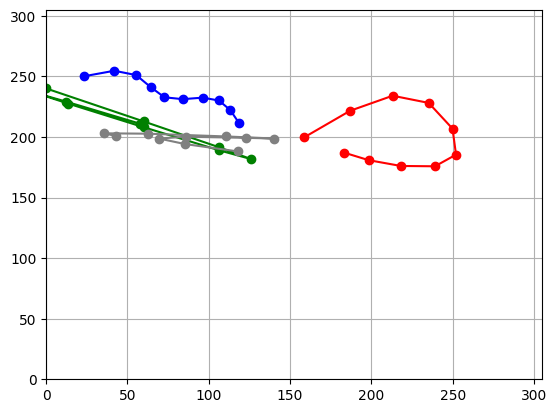

In [ ]:
plt.plot(X[pos][0:10],X[pos][10:20],color='blue',marker='o')
plt.plot(X[pos][20:30], X[pos][30:40],color='green',marker='o')
plt.plot(X[pos][40:50], X[pos][50:60],color='red',marker='o')
plt.plot(X[pos][60:70], X[pos][70:80],color='gray',marker='o')
plt.ylim((0, 305))
plt.xlim((0, 305))
plt.grid(True)

#1. Implemente el  modelo de Árboles de Decisión. Evalúe los resultados obtenidos interpretando la matriz de confusión, Precision-Recall.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)
X_train.shape[0]/X.shape[0]

0.7

In [ ]:
tree_clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, random_state=0)

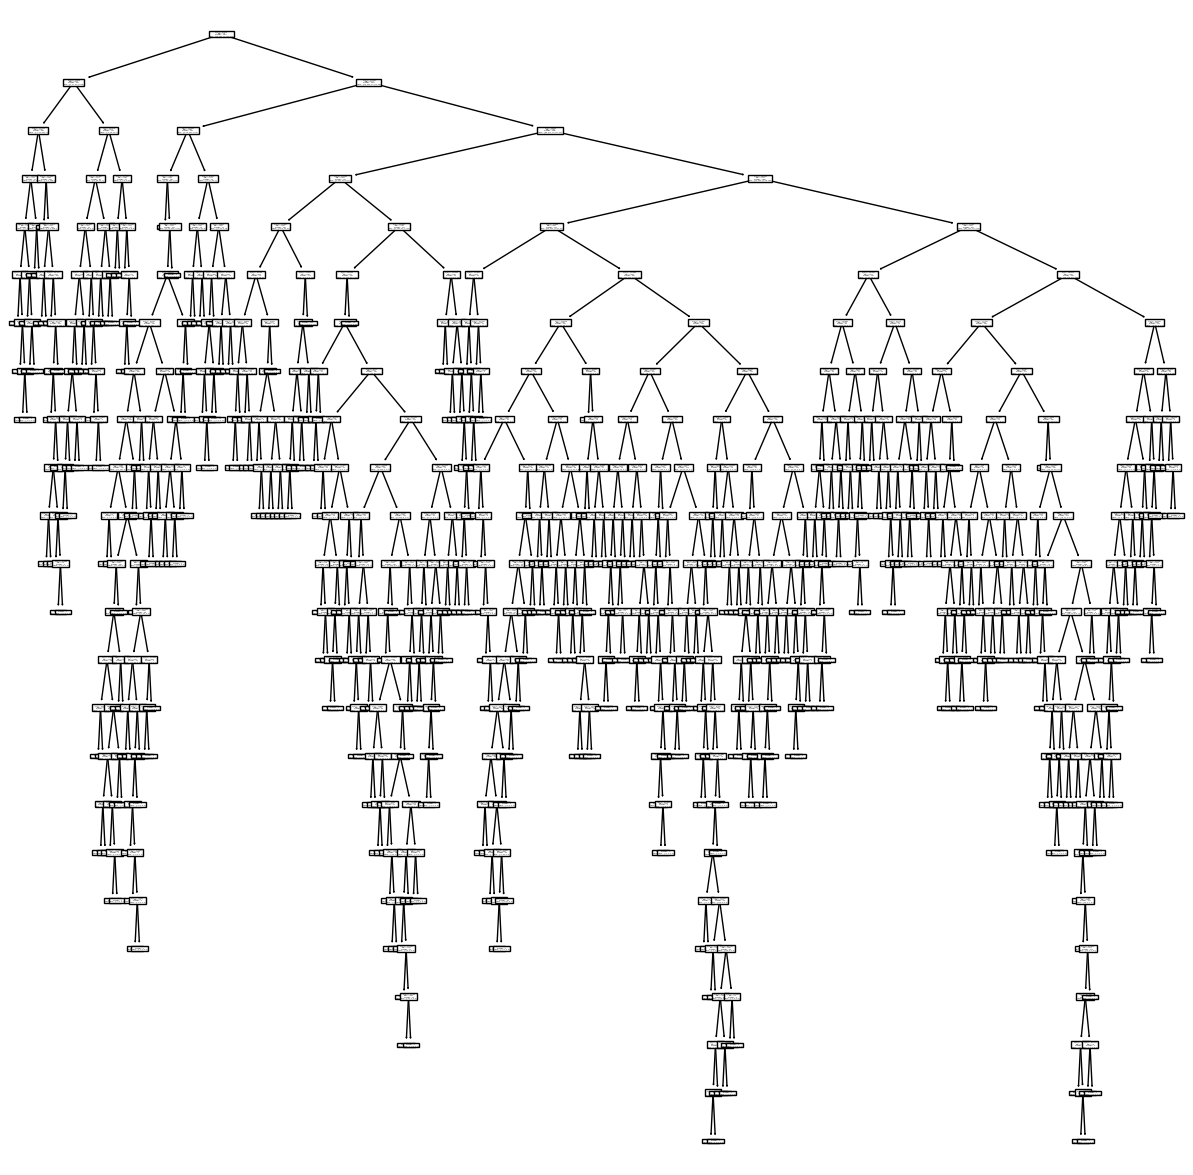

In [ ]:
tree_clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0)
tree_clf.fit(X_train,y_train)

plt.figure(figsize=(15,15))
plot_tree(tree_clf)
plt.show()

print()

In [ ]:
y_train_pred=cross_val_predict(tree_clf,X_train,y_train,cv=5)
y_train_pred


array([0, 2, 2, ..., 2, 2, 1], dtype=uint8)

In [ ]:
tree_conf=confusion_matrix(y_train,y_train_pred)
tree_conf

array([[457, 134,  63,   4,  58],
       [134, 422,  58,  14,  76],
       [ 63,  92, 496,  21,  29],
       [  8,  17,  23, 609,  46],
       [ 59,  76,  42,  48, 451]])

##Interpretación de la matriz de confusión arboles:
- Se evidencia que hay mucha dispersión entre los datos, sin embargo hay algunas posibilidades que dan unas probabilidades más altas en las que se puede tener mas certeza de los resultados. Teniendo como resutlados que bat y bird son los resultados que mas confusión presentan.

In [ ]:
precision_score(y_train,y_train_pred, average ='weighted'),recall_score(y_train,y_train_pred,average='weighted'),f1_score(y_train,y_train_pred,average='weighted')

(0.6976102230725452, 0.6957142857142857, 0.696533397604267)

In [ ]:
y_score_prob_tree=cross_val_predict(tree_clf,X_train,y_train,cv=5,method='predict_proba')
y_score_prob_tree

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

#2. Implemente el  modelo de Random Forest. Evalúe los resultados obtenidos interpretando la matriz de confusión, Precision-Recall.

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=10000,random_state=0,max_features='sqrt')
%time rf_clf.fit(X_train, y_train)
%time y_train_pred_rf= cross_val_predict(rf_clf,X_train,y_train,cv=5)

CPU times: user 4min 20s, sys: 1.78 s, total: 4min 21s
Wall time: 4min 25s
CPU times: user 17min 17s, sys: 3.81 s, total: 17min 20s
Wall time: 17min 26s


In [ ]:
rf_conf= confusion_matrix(y_train, y_train_pred_rf)
rf_conf

array([[527, 117,  50,   2,  20],
       [ 91, 527,  54,   3,  29],
       [ 23,  51, 605,  13,   9],
       [  1,   7,  17, 659,  19],
       [ 22,  48,  21,   5, 580]])

## Interpretación de la matriz de consusión con Random forest
- si bien se evidencia tambien dispersión con Random forest se evidencia mayor probabilidad de aciertos teniendo más resultados verdaderos positivos y más cercanos al 100% de precisión. Teniendo en cuenta que la confusión entre bat y bird sigue siendo un poco elevada lo que podría llegar a generar errores.

In [ ]:
precision_score(y_train,y_train_pred_rf,a verage="weighted"),recall_score(y_train,y_train_pred_rf,average="weighted"),f1_score(y_train,y_train_pred_rf,average="weighted")

(0.8305022081915302, 0.828, 0.8286356728708673)

#3.Implemente el  modelo de Gradient Boosting Trees. Evalúe los resultados obtenidos interpretando la matriz de confusión, Precision-Recall.

In [ ]:
boost_clf=GradientBoostingClassifier(n_estimators=5000,learning_rate= 0.1,random_state=0, max_depth=2)
%time boost_clf.fit(X_train,y_train)
%time y_train_pred_boost= cross_val_predict(boost_clf,X_train,y_train, cv=5)

boost_conf=confusion_matrix(y_train,y_train_pred_boost)
boost_conf

CPU times: user 29min 6s, sys: 1.8 s, total: 29min 7s
Wall time: 29min 7s
CPU times: user 1h 55min 4s, sys: 7.84 s, total: 1h 55min 12s
Wall time: 1h 55min 6s


array([[560, 102,  40,   2,  12],
       [116, 528,  37,   3,  20],
       [ 31,  43, 609,  13,   5],
       [  2,  11,   9, 662,  19],
       [ 20,  40,   8,   6, 602]])

## Esta matriz de confusión nos muestra que con este metodo hay muchos mas positivos positivos dentro del modelo. Lo que hace que sea mas exacto que los otros realizados anteriormente y que pueda tener un mayor grado de confiabilidad

In [ ]:
precision_score(y_train,y_train_pred_boost,average = "weighted"),recall_score(y_train,y_train_pred_boost,average = "weighted"),f1_score(y_train,y_train_pred_boost,average = "weighted")

(0.8478768115148171, 0.846, 0.8468356082050678)

# 4. Tabla de comparación

In [ ]:
train_rf = [precision_score(y_train,y_train_pred_rf,average="weighted"),recall_score(y_train,y_train_pred_rf,average="weighted"),f1_score(y_train,y_train_pred_rf,average="weighted")]

train = [precision_score(y_train,y_train_pred, average ='weighted'),recall_score(y_train,y_train_pred,average='weighted'),f1_score(y_train,y_train_pred,average='weighted')]

train_boost = [precision_score(y_train,y_train_pred_boost,average = "weighted"),recall_score(y_train,y_train_pred_boost,average = "weighted"),f1_score(y_train,y_train_pred_boost,average = "weighted")]

In [ ]:
results_df = pd.DataFrame({'Modelo': ['Random Forest', 'Modelo 2', 'Boosting'],
                           'Precision': [train_rf[0], train[0], train_boost[0]],
                           'Recall': [train_rf[1], train[1], train_boost[1]],
                           'F1-score': [train_rf[2], train[2], train_boost[2]]})

In [ ]:
print(results_df)

          Modelo  Precision    Recall  F1-score
0  Random Forest   0.830502  0.828000  0.828636
1       Modelo 2   0.697610  0.695714  0.696533
2       Boosting   0.847877  0.846000  0.846836


## El mejor modelo para hacer este ejercicio es boosting puesto que arroja resultados con favorabilidad del 84% y esto nos representa una mejora frente a los otroas dos modelos

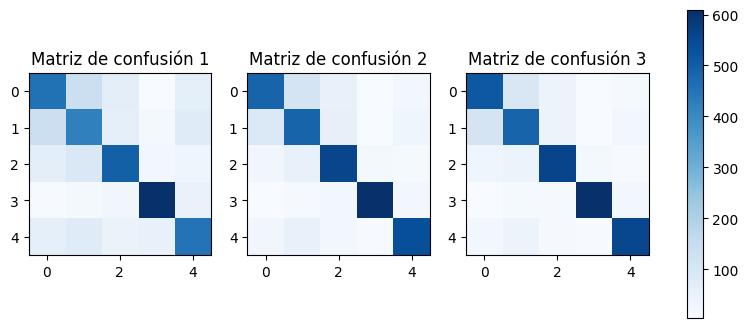

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

im1 = ax[0].imshow(tree_conf, cmap='Blues')
ax[0].set_title('Matriz de confusión 1')

im2 = ax[1].imshow(rf_conf, cmap='Blues')
ax[1].set_title('Matriz de confusión 2')

im3 = ax[2].imshow(boost_conf, cmap='Blues')
ax[2].set_title('Matriz de confusión 3')

cbar = fig.colorbar(im1, ax=ax.ravel().tolist(), shrink=0.8)

plt.show()

#Bat =0
#Bird = 1
#Cactus = 2
#Calculator = 3
#Camera = 4